In [2]:
### Importing relevant libraries and importing data

# Importing necessary libraries
import numpy as np
import pandas as pd
import os
import math
from functools import reduce
from math import log
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.signal import argrelmin, argrelmax, find_peaks
from scipy.optimize import curve_fit, minimize
from scipy import signal
import warnings
import scipy as sc
from astropy.io import fits
from astropy.table import Table, Column

hdulist = fits.open('../../Real Data/Healthy_Control_Data/Four_dots_blink_exp.fits')
data = hdulist[0].data

# Getting t data
t = np.linspace(0,500,500)

# Extracting x data and averaging
x = [ [] for i in range(46)]

for i in range(46):

    x[i] = data[0,i,0,:]

x1 = np.array(x)
x_data = np.sum(x1, axis=0)/46

# Extracting y data and averaging
y = [ [] for i in range(46)]

for i in range(46):

    y[i] = data[0,i,1,:]

y1 = np.array(y)
y_data = np.sum(y1, axis=0)/46

# Finding r data
r_data = np.sqrt(x_data**2 + y_data**2)

# Ignoring warnings printed to screen
warnings.filterwarnings("ignore")

In [3]:
### Function to compute takens emedded data for a specified delay and embedding dimension

def takens_embedding(data, delay, dimension):

    if delay*dimension > len(data):
        raise NameError('Delay times dimension exceeds length of data')       # Ensures that delay is not going to be too large such that it is larger than the data length 
    
    embedded_data = np.array([data[0:len(data)-delay*dimension]])

    for i in range(1, dimension):
        embedded_data = np.append(embedded_data, [data[i*delay:len(data) - delay*(dimension - i)]], axis=0)

    return embedded_data;

In [4]:
### Function to compute the power specttrum of the phase space

def power_spectrum(data_array,time):

    fouriert_1 = sc.fft.rfft(data_array, len(time))
    fourier_freq = sc.fft.rfftfreq(len(time), d = 1e-3)
    power_spec = np.abs(fouriert_1)**2

    return power_spec, fourier_freq

In [5]:
### Function to compute minimisation to find mid point for linear rise section of the divergence plot 

def minimisation(avlogdiv, n, m2, m1, c1, c2):

    func_to_min = m2*avlogdiv[n] + c2 - (m1*avlogdiv[n]+c1)

    return func_to_min

Text(0.5, 0.92, 'Phase space reconstruction for eye movement data - x data')

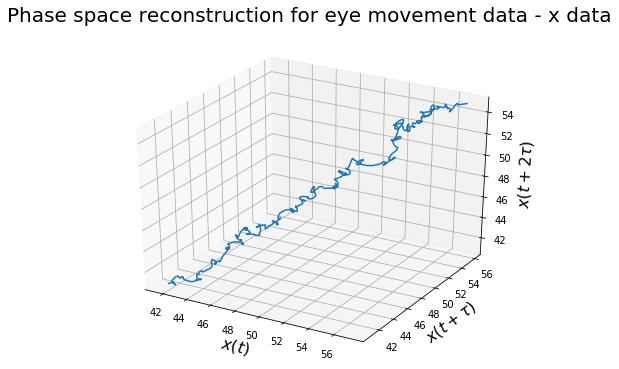

In [6]:
### Performing phase space reconstruction for x data 

embedded_x_final = takens_embedding(x_data, 20, 3)

fig = plt.figure()
fig.set_size_inches(8,6)
ax = plt.axes(projection='3d')
ax.plot3D(embedded_x_final[0,:], embedded_x_final[1,:], embedded_x_final[2,:])
ax.set_xlabel('$x(t)$', fontsize=16)
ax.set_ylabel('$x(t+\u03C4)$', fontsize=16)
ax.set_zlabel('$x(t+2\u03C4)$', fontsize=16)
ax.set_title('Phase space reconstruction for eye movement data - x data', fontsize=20, pad=40)

Text(0.5, 0, '$y(t+2τ)$')

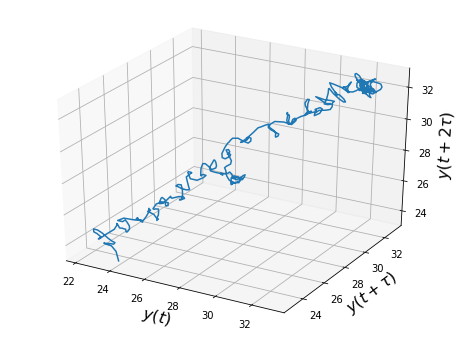

In [7]:
### Performing phase space reconstruction for y data 

embedded_y_final = takens_embedding(y_data, 19, 3)

fig = plt.figure()
fig.set_size_inches(8,6)
ax = plt.axes(projection='3d')
ax.plot3D(embedded_y_final[0,:], embedded_y_final[1,:], embedded_y_final[2,:])
ax.set_xlabel('$y(t)$', fontsize=16)
ax.set_ylabel('$y(t+\u03C4)$', fontsize=16)
ax.set_zlabel('$y(t+2\u03C4)$', fontsize=16)

Text(0.5, 0, '$r(t+2τ)$')

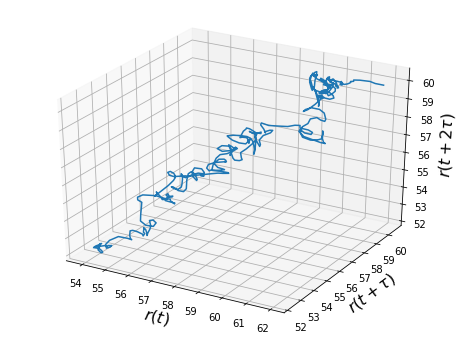

In [8]:
### Performing phase space reconstruction for r data 

embedded_r_final = takens_embedding(r_data, 27, 3)

fig = plt.figure()
fig.set_size_inches(8,6)
ax = plt.axes(projection='3d')
ax.plot3D(embedded_r_final[0,:], embedded_r_final[1,:], embedded_r_final[2,:])
ax.set_xlabel('$r(t)$', fontsize=16)
ax.set_ylabel('$r(t+\u03C4)$', fontsize=16)
ax.set_zlabel('$r(t+2\u03C4)$', fontsize=16)

250.0
The period of x data is 0.004 seconds


Text(0, 0.5, 'Power')

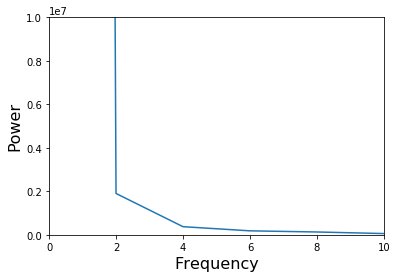

In [9]:
### Power spectrum for x data

# Calculating the power spectrum for x data 
power_spectrum_x = power_spectrum(x_data,t)
freq_x = power_spectrum_x[1]
power_x = power_spectrum_x[0]

# Finding index for the maxima on the graph
mean_freq_x = np.mean(freq_x)
period_x = 1/mean_freq_x

print(mean_freq_x)
print('The period of x data is', + period_x,'seconds')

# Plotting graph and maxima point
plt.plot(freq_x, power_x)
plt.xlim(0, 10)
plt.ylim(0, 1e7)
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('Power', fontsize=16)

The period of y data is 0.004 seconds


Text(0, 0.5, 'Power')

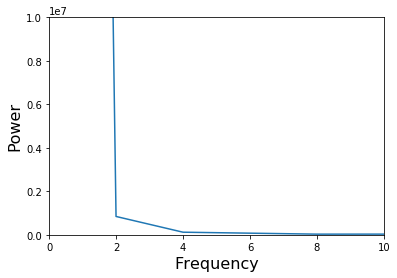

In [10]:
### Power spectrum for y data

power_spectrum_y = power_spectrum(y_data,t)
freq_y = power_spectrum_y[1]
power_y = power_spectrum_y[0]

# Finding index for the maxima on the graph
mean_freq_y = np.mean(freq_y)
period_y = 1/mean_freq_y

print('The period of y data is', + period_y,'seconds')

plt.plot(freq_y, power_y)
plt.xlim(0, 10)
plt.ylim(0, 1e7)
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('Power', fontsize=16)

The period of r data is 0.004 seconds


Text(0, 0.5, 'Power')

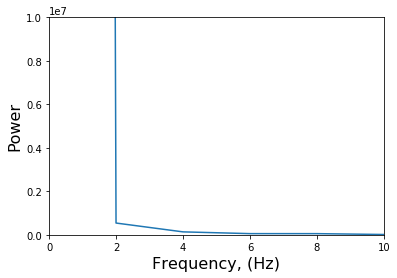

In [11]:
### Power spectrum for r data

power_spectrum_r = power_spectrum(r_data,t)
freq_r = power_spectrum_r[1]
power_r = power_spectrum_r[0]

# Finding index for the maxima on the graph
mean_freq_r = np.mean(freq_r)
period_r = 1/mean_freq_r

print('The period of r data is', + period_r,'seconds')


plt.plot(freq_r, power_r)
plt.xlim(0, 10)
plt.ylim(0, 1e7)
plt.xlabel('Frequency, (Hz)', fontsize=16)
plt.ylabel('Power', fontsize=16)

In [12]:
### Nearest neighbours for x data 

nearest_neighbours_x = NearestNeighbors(n_neighbors=200, algorithm='auto').fit(embedded_x_final.transpose())
distances_x, indices_x = nearest_neighbours_x.kneighbors(embedded_x_final.transpose())

print(indices_x[0])

[  0   1   4   2   3   5   6  10   9  11   7  13   8  12  14  15  16  17
  19  18  20  21  24  25  23  22  36  26  35  34  37  27  33  29  31  30
  32  43  38  39  44  28  40  42  41  55  45  56  54  57  46  53  58  50
  51  59  49  52  60  47  61  64  48  63  62  75  65  74  66  67  73  68
  76  69  72  71  70  77  79  78  80  84  81  85  83  82  86  95  94  87
  88  93  96  97  89 113  90  92 114  98 100  91  99 101 115 112 106 102
 105 104 107 103 116 111 108 117 110 109 125 126 121 124 120 122 118 123
 119 127 133 134 135 128 132 136 137 131 129 140 138 145 141 130 139 142
 144 146 143 147 152 153 148 154 151 149 150 155 156 161 162 163 160 164
 157 159 158 165 166 167 172 173 168 174 171 175 169 181 180 170 176 182
 179 177 183 184 178 185 186 187 188 192 191 190 189 193 203 204 194 202
 201 195]


In [13]:
### Nearest neighbours for y data 

nearest_neighbours_y = NearestNeighbors(n_neighbors=200, algorithm='auto').fit(embedded_y_final.transpose())
distances_y, indices_y = nearest_neighbours_y.kneighbors(embedded_y_final.transpose())

print(indices_y[0])

[  0   1   2   7   3   6   8   5   4   9  10  18  17  16  19  29  28  11
  20  30  27  24  26  25  15  31  12  21  23  14  32  22  13  33  35  36
  34  37  39  42  41  48  38  47  43  40  49  44  45  46  50  61  60  62
  58  59  55  57  56  54  51  63  53  52  67  68  64  66  65  69  80  73
  74  79  72  81  70  75  71  82  78  76  77  83  87  86  85  84  92  91
  93  94  88  90  89  95  99  96 100 101 102  98  97 103 104 105 106 113
 112 114 107 111 110 108 109 119 115 118 120 117 116 121 133 125 134 132
 124 122 155 123 137 138 156 152 136 135 154 139 153 126 170 140 151 171
 131 127 157 169 163 172 144 164 141 128 145 168 143 130 173 158 129 165
 142 150 174 162 167 146 166 159 175 160 161 149 147 188 176 187 148 177
 189 186 178 183 182 184 185 179 181 190 180 191 192 193 194 206 207 195
 196 205]


In [14]:
### Nearest neighbours for r data 

nearest_neighbours_r = NearestNeighbors(n_neighbors=200, algorithm='auto').fit(embedded_r_final.transpose())
distances_r, indices_r = nearest_neighbours_r.kneighbors(embedded_r_final.transpose())

print(indices_r[0])

[  0   1   2   3   4   6   5   8   7   9  10  11  19  18  12  17  13  16
  20  14  25  15  24  26  27  58  59  29  57  61  28  60  21  62  74  41
  43  42  40  63  23  56  44  75  30  89  73  50  31  51  22  35  90  55
  33  64  34  32  54  39  72  36  67  65  45  53  76  88  66  52  49  37
  71  84  38  85  68  46  86  91  94  77  87  95 100  69 101  70 102  99
  83 113 114  93  79  98  78  81  97  48  92  96 103  80 112  47 115 104
  82 107 106 108 105 111 109 110 116 121 122 117 119 118 120 126 123 127
 124 125 149 128 150 148 134 133 135 136 132 138 137 160 147 151 159 146
 129 131 161 153 152 139 165 130 158 145 154 164 162 155 140 163 166 157
 156 144 141 142 143 167 168 169 176 175 177 170 172 171 174 173 178 185
 186 223 179 184 222 187 180 224 183 182 181 221 188 193 217 216 192 225
 212 194]


0.003405153242272095
0.0003507434913128891


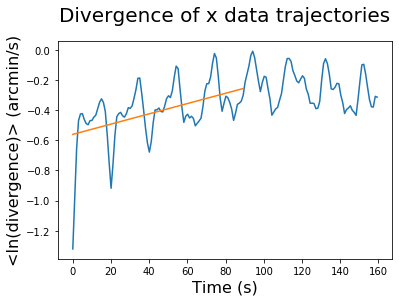

In [15]:
### Divergence for x data 

# Initialising arrays needed for divergence calculation
N = 160
separation_x1 = [ [] for i in range(N)]
logsep_x1 = [ [] for i in range(N)]
lags_x = []
xx_1 = [ [] for i in range(N)]
eps = period_x # Change this when period worked out from power spectrum    


# Extracting time differences between nearest neighbours
for i in range(N):
    xx_1[i] = indices_x[i] - i

xx_2 = np.array(xx_1)
times_x = xx_2*1e-3

for i in range(N):

    m_x = 0

    while np.abs(times_x[i][m_x]) < eps and m_x < 199:

        m_x = m_x + 1

    lags_x.append(times_x[i][m_x]) 

lags_x1 = np.array(lags_x)/1e-3
lags_x2 = lags_x1.astype(int)


# Calculating the divergence for Lyapunov exponent calculation
for i in range(0,N):
    
    for j in range(0,N):

        divv1 = np.sqrt((embedded_x_final[0,i+j+lags_x2[i]] - embedded_x_final[0,i+j])**2 + (embedded_x_final[1,i+j+lags_x2[i]] - embedded_x_final[1,i+j])**2 + (embedded_x_final[2,i+j+lags_x2[i]] - embedded_x_final[2,i+j])**2)
        separation_x1[j].append(divv1)


sep_x1 = np.array(separation_x1)

# Taking the logarithm of the divergence array
for i in range(N):

    logsep_x1[i] = np.log(sep_x1[i])

logsep_x1 = np.array(logsep_x1)

# Calculating the averaged ln(divergence)
av_log_div_x = np.mean(logsep_x1, axis = 1)

# Performing the linear regression calculation
t_regx = t[0:90].reshape(-1,1)
divx_reg = av_log_div_x[0:90].reshape(-1,1)

reg_x = LinearRegression().fit(t_regx, divx_reg)
grad_x = reg_x.coef_.item()
intercept_x = reg_x.intercept_.item()

resx = av_log_div_x[0:90] - (t[0:90]*grad_x + intercept_x)
resx_sq = np.sum(resx**2)
tmean = np.mean(t[0:90])
ttx = np.sum((t[0:90]-tmean)**2)

error_x = np.sqrt((1/318)*(resx_sq/ttx))

plt.plot(t[0:160], av_log_div_x)
plt.plot(t[0:90], t[0:90]*grad_x + intercept_x)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('<ln(divergence)> (arcmin/s)', fontsize=16)
plt.title('Divergence of x data trajectories', fontsize=20, pad=20)


print(grad_x)
print(error_x)


Text(0.5, 1.0, 'Divergence of y data trajectories')

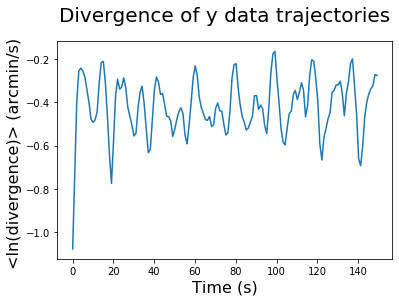

In [16]:
### Divergence for y data 

# Initialising arrays needed for divergence calculation
N = 150
separation_y1 = [ [] for i in range(N)]
logsep_y1 = [ [] for i in range(N)]
lags_y = []
yy_1 = [ [] for i in range(N)]
eps = period_y # Change this when period worked out from power spectrum    


# Extracting time differences between nearest neighbours
for i in range(N):
    yy_1[i] = indices_y[i] - i

yy_2 = np.array(yy_1)
times_y = yy_2*1e-3

for i in range(N):

    m_y = 0

    while np.abs(times_y[i][m_y]) < eps and m_y < 199:

        m_y = m_y + 1

    lags_y.append(times_y[i][m_y]) 

lags_y1 = np.array(lags_y)/1e-3
lags_y2 = lags_y1.astype(int)


# Calculating the divergence for Lyapunov exponent calculation
for i in range(0,N):
    
    for j in range(0,N):

        divv_y = np.sqrt((embedded_y_final[0,i+j+lags_y2[i]] - embedded_y_final[0,i+j])**2 + (embedded_y_final[1,i+j+lags_y2[i]] - embedded_y_final[1,i+j])**2 + (embedded_y_final[2,i+j+lags_y2[i]] - embedded_y_final[2,i+j])**2)
        separation_y1[j].append(divv_y)


sep_y1 = np.array(separation_y1)

# Taking the logarithm of the divergence array
for i in range(N):

    logsep_y1[i] = np.log(sep_y1[i])

logsep_y1 = np.array(logsep_y1)

# Calculating the averaged ln(divergence)
av_log_div_y = np.mean(logsep_y1, axis = 1)

# Performing the linear regression calculation
#t_regy = t[0:120].reshape(-1,1)
#divy_reg = av_log_div_y[0:120].reshape(-1,1)

#reg_y = LinearRegression().fit(t_regy, divy_reg)
#grad_y = reg_y.coef_.item()
#intercept_y = reg_y.intercept_.item()

#resy = av_log_div_y[0:120] - (t[0:120]*grad_y + intercept_y)
#resy_sq = np.sum(resy**2)
#tmean_y = np.mean(t[0:120])
#tty = np.sum((t[0:120]-tmean_y)**2)

#error_y = np.sqrt((1/118)*(resy_sq/tty))

plt.plot(t[0:150], av_log_div_y)
#plt.plot(t[0:120], t[0:120]*grad_y + intercept_y)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('<ln(divergence)> (arcmin/s) ', fontsize=16)
plt.title('Divergence of y data trajectories', fontsize=20, pad=20)

#print(grad_y)
#print(error_y)


0.007801315039193275
0.0010127858154581997


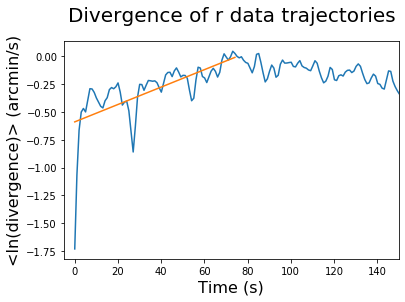

In [18]:
### Divergence for r data 

# Initialising arrays needed for divergence calculation
N = 160
separation_r1 = [ [] for i in range(N)]
logsep_r1 = [ [] for i in range(N)]
lags_r = []
rr_1 = [ [] for i in range(N)]
eps = period_r # Change this when period worked out from power spectrum    


# Extracting time differences between nearest neighbours
for i in range(N):
    rr_1[i] = indices_r[i] - i

rr_2 = np.array(rr_1)
times_r = rr_2*1e-3

for i in range(N):

    m_r = 0

    while np.abs(times_r[i][m_r]) < eps and m_r < 199:

        m_r = m_r + 1

    lags_r.append(times_r[i][m_r]) 

lags_r1 = np.array(lags_r)/1e-3
lags_r2 = lags_r1.astype(int)


# Calculating the divergence for Lyapunov exponent calculation
for i in range(0,N):
    
    for j in range(0,N):

        divv_r = np.sqrt((embedded_r_final[0,i+j+lags_r2[i]] - embedded_r_final[0,i+j])**2 + (embedded_r_final[1,i+j+lags_r2[i]] - embedded_r_final[1,i+j])**2 + (embedded_r_final[2,i+j+lags_r2[i]] - embedded_r_final[2,i+j])**2)
        separation_r1[j].append(divv_r)


sep_r1 = np.array(separation_r1)

# Taking the logarithm of the divergence array
for i in range(N):

    logsep_r1[i] = np.log(sep_r1[i])

logsep_r1 = np.array(logsep_r1)

# Calculating the averaged ln(divergence)
av_log_div_r = np.mean(logsep_r1, axis = 1)

# Performing the linear regression calculation
t_regr = t[0:75].reshape(-1,1)
divr_reg = av_log_div_r[0:75].reshape(-1,1)

reg_r = LinearRegression().fit(t_regr, divr_reg)
grad_r = reg_r.coef_.item()
intercept_r = reg_r.intercept_.item()

resr = av_log_div_r[0:75] - (t[0:75]*grad_r + intercept_r)
resr_sq = np.sum(resr**2)
tmean_r = np.mean(t[0:75])
ttr = np.sum((t[0:75]-tmean_r)**2)

error_r = np.sqrt((1/73)*(resr_sq/ttr))

plt.plot(t[0:160], av_log_div_r)
plt.plot(t[0:75], t[0:75]*grad_r + intercept_r)
plt.xlabel('Time (s)', fontsize=16)
plt.xlim(-5,150)
plt.ylabel('<ln(divergence)> (arcmin/s)', fontsize=16)
plt.title('Divergence of r data trajectories', fontsize=20, pad=20)

print(grad_r)
print(error_r)